In [2]:
import pandas as pd
import datetime
import collections
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#Filter movie countries to USA
#Convert date_published and year to the correct date format
#Drop 'budget', 'usa_gross_income', 'worlwide_gross_income','metascore' from data frame due to the amount of missing data

In [104]:
movies = pd.read_csv('imdb_movies.csv')
ratings = pd.read_csv('imdb_ratings.csv')

usa_movies = movies.merge(ratings, on='imdb_title_id', suffixes=('_movies','_ratings'))
#usa_movies = pd.DataFrame(movies[movies['country'] =='USA'])
#usa_movies['date_published'] = usa_movies['date_published'].astype('datetime64[ns]')
#usa_movies['year'] = pd.DatetimeIndex(usa_movies['date_published']).year
#usa_movies = usa_movies.drop(['budget', 'usa_gross_income', 'worlwide_gross_income','metascore'], axis=1)
usa_movies.info()
#usa_movies.head()
#ratings
#usa_movies

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85854 entries, 0 to 85853
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   imdb_title_id              85854 non-null  object 
 1   title                      85854 non-null  object 
 2   original_title             85854 non-null  object 
 3   year                       85854 non-null  int64  
 4   date_published             85854 non-null  object 
 5   genre                      85854 non-null  object 
 6   duration                   85854 non-null  int64  
 7   country                    85790 non-null  object 
 8   language                   85021 non-null  object 
 9   director                   85767 non-null  object 
 10  writer                     84282 non-null  object 
 11  production_company         81399 non-null  object 
 12  actors                     85785 non-null  object 
 13  description                83739 non-null  obj

In [99]:
usa_movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,1.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,25.0,3.0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1913,1913-01-01,"Biography, Drama",60,USA,English,Sidney Olcott,Gene Gauntier,Kalem Company,"R. Henderson Bland, Percy Dyer, Gene Gauntier,...","An account of the life of Jesus Christ, based ...",5.7,484,13.0,5.0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,55,USA,English,D.W. Griffith,"D.W. Griffith, H.E. Aitken",Majestic Motion Picture Company,"Henry B. Walthall, Josephine Crowell, Lillian ...",John Howard Payne at his most miserable point ...,5.8,187,6.0,NaN
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime, Drama",88,USA,English,George Loane Tucker,NaN,Independent Moving Pictures Co. of America (IMP),"Jane Gail, Ethel Grandin, William H. Turner, M...","A woman, with the aid of her police officer sw...",6.0,552,14.0,11.0


In [6]:
unique_genre = usa_movies['genre'].str.split(', ').explode()
#genre = genre
unique_genre

0          Romance
3            Drama
3          History
5        Biography
5            Drama
           ...    
85837    Animation
85837    Adventure
85837       Family
85838       Action
85838       Comedy
Name: genre, Length: 61742, dtype: object

Which genre has the most movies?

In [7]:
genre_count = collections.Counter(unique_genre)
genre_count = genre_count.most_common()
genre_count

[('Drama', 13827),
 ('Comedy', 9971),
 ('Romance', 5131),
 ('Horror', 4590),
 ('Thriller', 4382),
 ('Action', 4273),
 ('Crime', 4266),
 ('Adventure', 2854),
 ('Mystery', 2012),
 ('Sci-Fi', 1774),
 ('Family', 1285),
 ('Fantasy', 1175),
 ('Western', 1127),
 ('Musical', 902),
 ('Music', 810),
 ('Biography', 703),
 ('War', 647),
 ('Film-Noir', 647),
 ('Sport', 492),
 ('History', 439),
 ('Animation', 432),
 ('Documentary', 1),
 ('News', 1),
 ('Reality-TV', 1)]

In [8]:
genre_count_df = pd.DataFrame(genre_count, columns=['Genre','Count'])
genre_count_df

,Genre,Count
0,Drama,13827
1,Comedy,9971
2,Romance,5131
3,Horror,4590
4,Thriller,4382
5,Action,4273
6,Crime,4266
7,Adventure,2854
8,Mystery,2012
9,Sci-Fi,1774


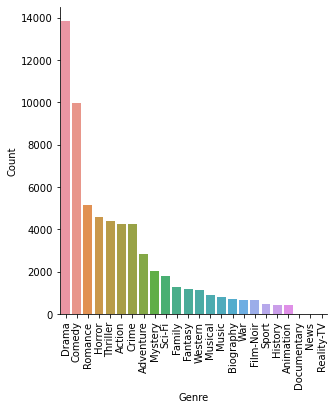

In [9]:
sns.catplot(x='Genre',y='Count', data=genre_count_df, kind='bar')
plt.xticks(rotation=90)
plt.show()

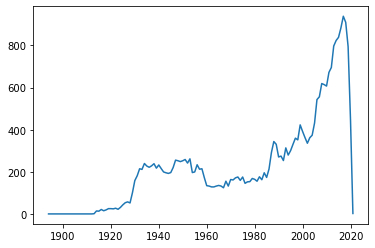

In [95]:
unique_yearngenre = usa_movies[['year','genre']]

year=unique_yearngenre['year'].value_counts().sort_index().plot(kind ='line') #value_counts()#.plot(kind='line')
year


#plt.plot()
#plt.show()

In [18]:
unique_yearngenre = usa_movies[['year','genre']]
unique_yearngenre


unique_yearngenre1 = (unique_yearngenre.set_index(['year'])['genre']
                    .astype(str)
                    .str.split(',', expand=True)
                    .stack()
                    .reset_index(level=-1, drop=True)
                    .reset_index(name='genre'))
unique_yearngenre1

,year,genre
0,1894,Romance
1,1912,Drama
2,1912,History
3,1913,Biography
4,1913,Drama
...,...,...
61737,2019,Animation
61738,2019,Adventure
61739,2019,Family
61740,2020,Action


Count how each genre progressed over the years

In [ ]:
unique_yearngenre1[unique_yearngenre1['year']>1970].groupby('year')['genre']

Over the years which genre became more popular?